In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
!unzip /content/drive/MyDrive/Keggle/HousePrice.zip

Archive:  /content/drive/MyDrive/Keggle/HousePrice.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [26]:
df = pd.read_csv('/content/housing.csv')

In [27]:
import pandas as pd


In [28]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [29]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [30]:
df_shuffled = df.sample(n=len(df), random_state=1)
df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [31]:
pd.get_dummies(df_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [32]:
df_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [33]:
df_final = pd.concat([df_shuffled.drop('ocean_proximity', axis=1),
                     pd.get_dummies(df_shuffled['ocean_proximity'])],axis=1)
df_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [34]:
df_final = df_final[['longitude',	'latitude',	
                                     'housing_median_age',	'total_rooms',	
                                     'total_bedrooms',	'population',	
                                     'households',	'median_income',	
                                     '<1H OCEAN',	
                                     'INLAND',	'ISLAND',	
                                     'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
df_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [35]:
df_final = df_final.dropna()
len(df_final)

20433

In [36]:
train_df, test_df, val_df = df_final[:18000], df_final[18000:19217], df_final[19215:]
len(train_df), len(test_df), len(val_df)

(18000, 1217, 1218)

In [37]:
X_train, y_train = train_df.to_numpy()[:, :-1], train_df.to_numpy()[:, -1]
X_val, y_val = val_df.to_numpy()[:, :-1], val_df.to_numpy()[:, -1]
X_test, y_test = test_df.to_numpy()[:, :-1], test_df.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [46]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])
def preprocessor(X):
  A = np.copy(X)
  A[:,:8] = scaler.transform(A[:, :8])
  return A

X_train_preprocessed, X_val_preprocessed, X_test_preprocessed = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [47]:
X_train_preprocessed.shape, X_val_preprocessed.shape, X_test_preprocessed.shape

((18000, 13), (1218, 13), (1217, 13))

In [48]:
pd.DataFrame(X_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0


In [49]:
import pandas as pd

<Axes: >

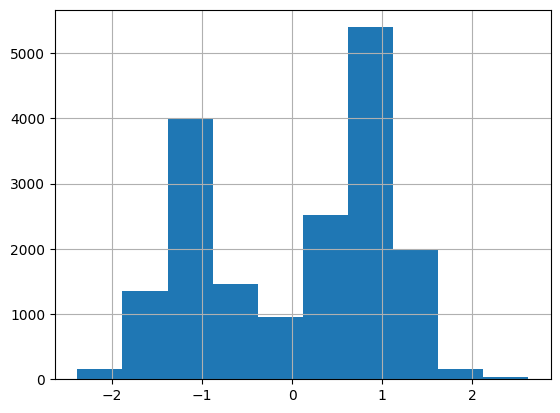

In [50]:
pd.DataFrame(X_train_preprocessed)[0].hist()

In [51]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

(68593.05578127236, 71382.43558330165)

In [68]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(53759.09908812057, 62161.22860469906)

In [62]:

from sklearn.neighbors import KNeighborsClassifier

In [69]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train,y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val),y_val, squared=False)

(43520.27011088849, 53275.32427600455)

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(47274.82259072157, 51343.744905129766)

In [74]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [80]:
simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1,'linear'))

opt=Adam(learning_rate=.1)
cp=ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val,y_val), callbacks=[cp], epochs=100)

Epoch 1/100
555/563 [============================>.] - ETA: 0s - loss: 51102531584.0000 - root_mean_squared_error: 226058.6875

563/563 [==============================] - 3s 4ms/step - loss: 50911272960.0000 - root_mean_squared_error: 225635.2656 - val_loss: 41666289664.0000 - val_root_mean_squared_error: 204123.2188
Epoch 2/100
539/563 [===========================>..] - ETA: 0s - loss: 29167792128.0000 - root_mean_squared_error: 170785.8125

563/563 [==============================] - 2s 3ms/step - loss: 28675612672.0000 - root_mean_squared_error: 169338.7500 - val_loss: 18279337984.0000 - val_root_mean_squared_error: 135201.1094
Epoch 3/100
540/563 [===========================>..] - ETA: 0s - loss: 12414451712.0000 - root_mean_squared_error: 111420.1562

563/563 [==============================] - 2s 3ms/step - loss: 12259142656.0000 - root_mean_squared_error: 110721.0156 - val_loss: 9058512896.0000 - val_root_mean_squared_error: 95176.2188
Epoch 4/100
560/563 [============================>.] - ETA: 0s - loss: 7657232384.0000 - root_mean_squared_error: 87505.6172

563/563 [==============================] - 2s 3ms/step - loss: 7651425280.0000 - root_mean_squared_error: 87472.4297 - val_loss: 6980443136.0000 - val_root_mean_squared_error: 83549.0469
Epoch 5/100
559/563 [============================>.] - ETA: 0s - loss: 6226939392.0000 - root_mean_squared_error: 78910.9609

563/563 [==============================] - 3s 4ms/step - loss: 6234712576.0000 - root_mean_squared_error: 78960.1953 - val_loss: 6051746304.0000 - val_root_mean_squared_error: 77792.9688
Epoch 6/100
546/563 [============================>.] - ETA: 0s - loss: 5470223360.0000 - root_mean_squared_error: 73960.9609

563/563 [==============================] - 3s 5ms/step - loss: 5457783296.0000 - root_mean_squared_error: 73876.8125 - val_loss: 5532342272.0000 - val_root_mean_squared_error: 74379.7188
Epoch 7/100
550/563 [============================>.] - ETA: 0s - loss: 5045451264.0000 - root_mean_squared_error: 71031.3438

563/563 [==============================] - 2s 4ms/step - loss: 5027554304.0000 - root_mean_squared_error: 70905.2500 - val_loss: 5287044096.0000 - val_root_mean_squared_error: 72712.0625
Epoch 8/100
557/563 [============================>.] - ETA: 0s - loss: 4832138240.0000 - root_mean_squared_error: 69513.5859

563/563 [==============================] - 2s 3ms/step - loss: 4842697728.0000 - root_mean_squared_error: 69589.4922 - val_loss: 5166516224.0000 - val_root_mean_squared_error: 71878.4844
Epoch 9/100
542/563 [===========================>..] - ETA: 0s - loss: 4775012864.0000 - root_mean_squared_error: 69101.4688

563/563 [==============================] - 2s 3ms/step - loss: 4761422848.0000 - root_mean_squared_error: 69003.0625 - val_loss: 5122417152.0000 - val_root_mean_squared_error: 71571.0625
Epoch 10/100
549/563 [============================>.] - ETA: 0s - loss: 4741303296.0000 - root_mean_squared_error: 68857.1250

563/563 [==============================] - 2s 3ms/step - loss: 4721854464.0000 - root_mean_squared_error: 68715.7500 - val_loss: 5101185024.0000 - val_root_mean_squared_error: 71422.5781
Epoch 11/100
561/563 [============================>.] - ETA: 0s - loss: 4698299904.0000 - root_mean_squared_error: 68544.1484

563/563 [==============================] - 2s 3ms/step - loss: 4697445376.0000 - root_mean_squared_error: 68537.9141 - val_loss: 5083652096.0000 - val_root_mean_squared_error: 71299.7344
Epoch 12/100
536/563 [===========================>..] - ETA: 0s - loss: 4670543360.0000 - root_mean_squared_error: 68341.3750

563/563 [==============================] - 2s 3ms/step - loss: 4678796288.0000 - root_mean_squared_error: 68401.7266 - val_loss: 5077964800.0000 - val_root_mean_squared_error: 71259.8438
Epoch 13/100
549/563 [============================>.] - ETA: 0s - loss: 4658297856.0000 - root_mean_squared_error: 68251.7266

563/563 [==============================] - 2s 3ms/step - loss: 4665940480.0000 - root_mean_squared_error: 68307.6875 - val_loss: 5062151680.0000 - val_root_mean_squared_error: 71148.7969
Epoch 14/100
563/563 [==============================] - 2s 3ms/step - loss: 4655561728.0000 - root_mean_squared_error: 68231.6797 - val_loss: 5068502528.0000 - val_root_mean_squared_error: 71193.4141
Epoch 15/100
558/563 [============================>.] - ETA: 0s - loss: 4634694656.0000 - root_mean_squared_error: 68078.5938

563/563 [==============================] - 2s 4ms/step - loss: 4645609472.0000 - root_mean_squared_error: 68158.7109 - val_loss: 5041537536.0000 - val_root_mean_squared_error: 71003.7891
Epoch 16/100
563/563 [==============================] - 1s 2ms/step - loss: 4640664064.0000 - root_mean_squared_error: 68122.4219 - val_loss: 5064622080.0000 - val_root_mean_squared_error: 71166.1562
Epoch 17/100
554/563 [============================>.] - ETA: 0s - loss: 4640439296.0000 - root_mean_squared_error: 68120.7734

563/563 [==============================] - 2s 3ms/step - loss: 4634922496.0000 - root_mean_squared_error: 68080.2656 - val_loss: 5034075648.0000 - val_root_mean_squared_error: 70951.2188
Epoch 18/100
563/563 [==============================] - 1s 2ms/step - loss: 4630036480.0000 - root_mean_squared_error: 68044.3750 - val_loss: 5044183040.0000 - val_root_mean_squared_error: 71022.4141
Epoch 19/100
563/563 [==============================] - 1s 2ms/step - loss: 4626058752.0000 - root_mean_squared_error: 68015.1328 - val_loss: 5043251712.0000 - val_root_mean_squared_error: 71015.8516
Epoch 20/100
563/563 [==============================] - 1s 2ms/step - loss: 4622323712.0000 - root_mean_squared_error: 67987.6719 - val_loss: 5041310720.0000 - val_root_mean_squared_error: 71002.1875
Epoch 21/100
563/563 [==============================] - 1s 2ms/step - loss: 4616453632.0000 - root_mean_squared_error: 67944.4922 - val_loss: 5034280448.0000 - val_root_mean_squared_error: 70952.6641
Epoch 22/100


563/563 [==============================] - 2s 3ms/step - loss: 4612755456.0000 - root_mean_squared_error: 67917.2656 - val_loss: 5005642752.0000 - val_root_mean_squared_error: 70750.5703
Epoch 23/100
563/563 [==============================] - 1s 2ms/step - loss: 4608321024.0000 - root_mean_squared_error: 67884.6172 - val_loss: 5012269568.0000 - val_root_mean_squared_error: 70797.3828
Epoch 24/100
563/563 [==============================] - 1s 2ms/step - loss: 4604679168.0000 - root_mean_squared_error: 67857.7891 - val_loss: 5016882688.0000 - val_root_mean_squared_error: 70829.9531
Epoch 25/100
563/563 [==============================] - 1s 3ms/step - loss: 4598938112.0000 - root_mean_squared_error: 67815.4688 - val_loss: 5024902144.0000 - val_root_mean_squared_error: 70886.5469
Epoch 26/100
562/563 [============================>.] - ETA: 0s - loss: 4595271680.0000 - root_mean_squared_error: 67788.4297

563/563 [==============================] - 2s 4ms/step - loss: 4594153472.0000 - root_mean_squared_error: 67780.1875 - val_loss: 4994385408.0000 - val_root_mean_squared_error: 70670.9688
Epoch 27/100
542/563 [===========================>..] - ETA: 0s - loss: 4596979200.0000 - root_mean_squared_error: 67801.0234

563/563 [==============================] - 2s 3ms/step - loss: 4588203520.0000 - root_mean_squared_error: 67736.2812 - val_loss: 4986132480.0000 - val_root_mean_squared_error: 70612.5547
Epoch 28/100
563/563 [==============================] - 1s 2ms/step - loss: 4582532608.0000 - root_mean_squared_error: 67694.4062 - val_loss: 4989381120.0000 - val_root_mean_squared_error: 70635.5547
Epoch 29/100
563/563 [==============================] - 1s 2ms/step - loss: 4576060416.0000 - root_mean_squared_error: 67646.5859 - val_loss: 4986643456.0000 - val_root_mean_squared_error: 70616.1719
Epoch 30/100
563/563 [==============================] - 1s 2ms/step - loss: 4568381952.0000 - root_mean_squared_error: 67589.8047 - val_loss: 4987315712.0000 - val_root_mean_squared_error: 70620.9297
Epoch 31/100
551/563 [============================>.] - ETA: 0s - loss: 4563258880.0000 - root_mean_squared_error: 67551.8984

563/563 [==============================] - 2s 3ms/step - loss: 4562517504.0000 - root_mean_squared_error: 67546.4062 - val_loss: 4972881920.0000 - val_root_mean_squared_error: 70518.6641
Epoch 32/100
545/563 [============================>.] - ETA: 0s - loss: 4541925888.0000 - root_mean_squared_error: 67393.8125

563/563 [==============================] - 2s 3ms/step - loss: 4553051136.0000 - root_mean_squared_error: 67476.2969 - val_loss: 4968613376.0000 - val_root_mean_squared_error: 70488.3906
Epoch 33/100
555/563 [============================>.] - ETA: 0s - loss: 4539886592.0000 - root_mean_squared_error: 67378.6797

563/563 [==============================] - 2s 3ms/step - loss: 4544571392.0000 - root_mean_squared_error: 67413.4375 - val_loss: 4947969536.0000 - val_root_mean_squared_error: 70341.8047
Epoch 34/100
550/563 [============================>.] - ETA: 0s - loss: 4546981376.0000 - root_mean_squared_error: 67431.3047

563/563 [==============================] - 2s 4ms/step - loss: 4535256576.0000 - root_mean_squared_error: 67344.3125 - val_loss: 4932236800.0000 - val_root_mean_squared_error: 70229.8828
Epoch 35/100
563/563 [==============================] - 1s 2ms/step - loss: 4525583872.0000 - root_mean_squared_error: 67272.4609 - val_loss: 4938975232.0000 - val_root_mean_squared_error: 70277.8438
Epoch 36/100
554/563 [============================>.] - ETA: 0s - loss: 4521925120.0000 - root_mean_squared_error: 67245.2578

563/563 [==============================] - 3s 5ms/step - loss: 4518670848.0000 - root_mean_squared_error: 67221.0625 - val_loss: 4921649664.0000 - val_root_mean_squared_error: 70154.4688
Epoch 37/100
558/563 [============================>.] - ETA: 0s - loss: 4516689920.0000 - root_mean_squared_error: 67206.3203

563/563 [==============================] - 3s 5ms/step - loss: 4511699968.0000 - root_mean_squared_error: 67169.1875 - val_loss: 4918232576.0000 - val_root_mean_squared_error: 70130.1094
Epoch 38/100
563/563 [==============================] - 1s 2ms/step - loss: 4503631360.0000 - root_mean_squared_error: 67109.1016 - val_loss: 4923165184.0000 - val_root_mean_squared_error: 70165.2734
Epoch 39/100
546/563 [============================>.] - ETA: 0s - loss: 4477902848.0000 - root_mean_squared_error: 66917.1328

563/563 [==============================] - 2s 3ms/step - loss: 4497905152.0000 - root_mean_squared_error: 67066.4219 - val_loss: 4900207616.0000 - val_root_mean_squared_error: 70001.4844
Epoch 40/100
536/563 [===========================>..] - ETA: 0s - loss: 4514821120.0000 - root_mean_squared_error: 67192.4219

563/563 [==============================] - 2s 3ms/step - loss: 4490672128.0000 - root_mean_squared_error: 67012.4766 - val_loss: 4897714176.0000 - val_root_mean_squared_error: 69983.6719
Epoch 41/100
558/563 [============================>.] - ETA: 0s - loss: 4467442176.0000 - root_mean_squared_error: 66838.9297

563/563 [==============================] - 2s 3ms/step - loss: 4483059200.0000 - root_mean_squared_error: 66955.6484 - val_loss: 4875293696.0000 - val_root_mean_squared_error: 69823.3047
Epoch 42/100
563/563 [==============================] - 1s 3ms/step - loss: 4476979200.0000 - root_mean_squared_error: 66910.2344 - val_loss: 4884900864.0000 - val_root_mean_squared_error: 69892.0625
Epoch 43/100
563/563 [==============================] - 1s 2ms/step - loss: 4470989824.0000 - root_mean_squared_error: 66865.4609 - val_loss: 4878073344.0000 - val_root_mean_squared_error: 69843.2031
Epoch 44/100
563/563 [==============================] - 1s 2ms/step - loss: 4462210560.0000 - root_mean_squared_error: 66799.7812 - val_loss: 4878159872.0000 - val_root_mean_squared_error: 69843.8281
Epoch 45/100
544/563 [===========================>..] - ETA: 0s - loss: 4443727360.0000 - root_mean_squared_error: 66661.2891

563/563 [==============================] - 2s 3ms/step - loss: 4456542208.0000 - root_mean_squared_error: 66757.3359 - val_loss: 4850092032.0000 - val_root_mean_squared_error: 69642.6016
Epoch 46/100
563/563 [==============================] - 1s 2ms/step - loss: 4451789312.0000 - root_mean_squared_error: 66721.7266 - val_loss: 4868832768.0000 - val_root_mean_squared_error: 69777.0234
Epoch 47/100
551/563 [============================>.] - ETA: 0s - loss: 4462834688.0000 - root_mean_squared_error: 66804.4531

563/563 [==============================] - 2s 3ms/step - loss: 4445389824.0000 - root_mean_squared_error: 66673.7578 - val_loss: 4849981440.0000 - val_root_mean_squared_error: 69641.8047
Epoch 48/100
562/563 [============================>.] - ETA: 0s - loss: 4440889344.0000 - root_mean_squared_error: 66640.0000

563/563 [==============================] - 2s 3ms/step - loss: 4441144832.0000 - root_mean_squared_error: 66641.9141 - val_loss: 4831688704.0000 - val_root_mean_squared_error: 69510.3516
Epoch 49/100
545/563 [============================>.] - ETA: 0s - loss: 4414112256.0000 - root_mean_squared_error: 66438.7891

563/563 [==============================] - 2s 3ms/step - loss: 4434280960.0000 - root_mean_squared_error: 66590.3984 - val_loss: 4812812288.0000 - val_root_mean_squared_error: 69374.4375
Epoch 50/100
563/563 [==============================] - 1s 2ms/step - loss: 4431654912.0000 - root_mean_squared_error: 66570.6797 - val_loss: 4827272192.0000 - val_root_mean_squared_error: 69478.5703
Epoch 51/100
563/563 [==============================] - 1s 2ms/step - loss: 4426685440.0000 - root_mean_squared_error: 66533.3438 - val_loss: 4819966976.0000 - val_root_mean_squared_error: 69425.9844
Epoch 52/100
550/563 [============================>.] - ETA: 0s - loss: 4425797632.0000 - root_mean_squared_error: 66526.6719

563/563 [==============================] - 2s 4ms/step - loss: 4420761088.0000 - root_mean_squared_error: 66488.8047 - val_loss: 4792469504.0000 - val_root_mean_squared_error: 69227.6641
Epoch 53/100
563/563 [==============================] - 2s 3ms/step - loss: 4418136064.0000 - root_mean_squared_error: 66469.0625 - val_loss: 4802965504.0000 - val_root_mean_squared_error: 69303.4297
Epoch 54/100
558/563 [============================>.] - ETA: 0s - loss: 4408199168.0000 - root_mean_squared_error: 66394.2734

563/563 [==============================] - 2s 4ms/step - loss: 4413659136.0000 - root_mean_squared_error: 66435.3750 - val_loss: 4790498304.0000 - val_root_mean_squared_error: 69213.4219
Epoch 55/100
563/563 [==============================] - 1s 2ms/step - loss: 4408631296.0000 - root_mean_squared_error: 66397.5234 - val_loss: 4812022784.0000 - val_root_mean_squared_error: 69368.7422
Epoch 56/100
560/563 [============================>.] - ETA: 0s - loss: 4402977280.0000 - root_mean_squared_error: 66354.9375

563/563 [==============================] - 2s 3ms/step - loss: 4405276672.0000 - root_mean_squared_error: 66372.2578 - val_loss: 4788148224.0000 - val_root_mean_squared_error: 69196.4453
Epoch 57/100
563/563 [==============================] - 1s 2ms/step - loss: 4402829312.0000 - root_mean_squared_error: 66353.8203 - val_loss: 4789172224.0000 - val_root_mean_squared_error: 69203.8438
Epoch 58/100
558/563 [============================>.] - ETA: 0s - loss: 4400323584.0000 - root_mean_squared_error: 66334.9375

563/563 [==============================] - 2s 3ms/step - loss: 4398969344.0000 - root_mean_squared_error: 66324.7266 - val_loss: 4773447168.0000 - val_root_mean_squared_error: 69090.1406
Epoch 59/100
563/563 [==============================] - 1s 2ms/step - loss: 4394372096.0000 - root_mean_squared_error: 66290.0625 - val_loss: 4774286336.0000 - val_root_mean_squared_error: 69096.2109
Epoch 60/100
543/563 [===========================>..] - ETA: 0s - loss: 4409204736.0000 - root_mean_squared_error: 66401.8438

563/563 [==============================] - 2s 3ms/step - loss: 4391523840.0000 - root_mean_squared_error: 66268.5703 - val_loss: 4765333504.0000 - val_root_mean_squared_error: 69031.3984
Epoch 61/100
563/563 [==============================] - 1s 2ms/step - loss: 4386358784.0000 - root_mean_squared_error: 66229.5938 - val_loss: 4778013184.0000 - val_root_mean_squared_error: 69123.1719
Epoch 62/100
563/563 [==============================] - 1s 2ms/step - loss: 4385022464.0000 - root_mean_squared_error: 66219.5000 - val_loss: 4774488576.0000 - val_root_mean_squared_error: 69097.6719
Epoch 63/100
547/563 [============================>.] - ETA: 0s - loss: 4379073536.0000 - root_mean_squared_error: 66174.5703

563/563 [==============================] - 2s 4ms/step - loss: 4381906432.0000 - root_mean_squared_error: 66195.9688 - val_loss: 4755161088.0000 - val_root_mean_squared_error: 68957.6797
Epoch 64/100
553/563 [============================>.] - ETA: 0s - loss: 4363374080.0000 - root_mean_squared_error: 66055.8438

563/563 [==============================] - 2s 3ms/step - loss: 4378729472.0000 - root_mean_squared_error: 66171.9688 - val_loss: 4745050112.0000 - val_root_mean_squared_error: 68884.3203
Epoch 65/100
549/563 [============================>.] - ETA: 0s - loss: 4373466624.0000 - root_mean_squared_error: 66132.1875

563/563 [==============================] - 2s 3ms/step - loss: 4374267392.0000 - root_mean_squared_error: 66138.2422 - val_loss: 4730502656.0000 - val_root_mean_squared_error: 68778.6484
Epoch 66/100
563/563 [==============================] - 1s 2ms/step - loss: 4370910208.0000 - root_mean_squared_error: 66112.8594 - val_loss: 4746898432.0000 - val_root_mean_squared_error: 68897.7422
Epoch 67/100
540/563 [===========================>..] - ETA: 0s - loss: 4345221120.0000 - root_mean_squared_error: 65918.2891

563/563 [==============================] - 2s 3ms/step - loss: 4366109184.0000 - root_mean_squared_error: 66076.5391 - val_loss: 4727610880.0000 - val_root_mean_squared_error: 68757.6250
Epoch 68/100
538/563 [===========================>..] - ETA: 0s - loss: 4360159232.0000 - root_mean_squared_error: 66031.5000

563/563 [==============================] - 2s 3ms/step - loss: 4360734208.0000 - root_mean_squared_error: 66035.8594 - val_loss: 4709111296.0000 - val_root_mean_squared_error: 68622.9609
Epoch 69/100
563/563 [==============================] - 1s 2ms/step - loss: 4356259840.0000 - root_mean_squared_error: 66001.9688 - val_loss: 4716725760.0000 - val_root_mean_squared_error: 68678.4219
Epoch 70/100
538/563 [===========================>..] - ETA: 0s - loss: 4326323200.0000 - root_mean_squared_error: 65774.7891

563/563 [==============================] - 2s 3ms/step - loss: 4352916992.0000 - root_mean_squared_error: 65976.6406 - val_loss: 4701197824.0000 - val_root_mean_squared_error: 68565.2812
Epoch 71/100
563/563 [==============================] - 1s 2ms/step - loss: 4350238208.0000 - root_mean_squared_error: 65956.3359 - val_loss: 4702739456.0000 - val_root_mean_squared_error: 68576.5234
Epoch 72/100
563/563 [==============================] - ETA: 0s - loss: 4342761984.0000 - root_mean_squared_error: 65899.6328

563/563 [==============================] - 2s 4ms/step - loss: 4342761984.0000 - root_mean_squared_error: 65899.6328 - val_loss: 4693200896.0000 - val_root_mean_squared_error: 68506.9375
Epoch 73/100
563/563 [==============================] - 1s 2ms/step - loss: 4338070016.0000 - root_mean_squared_error: 65864.0234 - val_loss: 4716304896.0000 - val_root_mean_squared_error: 68675.3594
Epoch 74/100
543/563 [===========================>..] - ETA: 0s - loss: 4348829696.0000 - root_mean_squared_error: 65945.6562

563/563 [==============================] - 2s 4ms/step - loss: 4335163392.0000 - root_mean_squared_error: 65841.9609 - val_loss: 4686392832.0000 - val_root_mean_squared_error: 68457.2344
Epoch 75/100
562/563 [============================>.] - ETA: 0s - loss: 4326678016.0000 - root_mean_squared_error: 65777.4922

563/563 [==============================] - 2s 3ms/step - loss: 4331063808.0000 - root_mean_squared_error: 65810.8203 - val_loss: 4679178752.0000 - val_root_mean_squared_error: 68404.5234
Epoch 76/100
538/563 [===========================>..] - ETA: 0s - loss: 4319308288.0000 - root_mean_squared_error: 65721.4453

563/563 [==============================] - 2s 3ms/step - loss: 4324018688.0000 - root_mean_squared_error: 65757.2734 - val_loss: 4675169280.0000 - val_root_mean_squared_error: 68375.2109
Epoch 77/100
563/563 [==============================] - 1s 2ms/step - loss: 4320873472.0000 - root_mean_squared_error: 65733.3516 - val_loss: 4681818112.0000 - val_root_mean_squared_error: 68423.8125
Epoch 78/100
550/563 [============================>.] - ETA: 0s - loss: 4322478592.0000 - root_mean_squared_error: 65745.5625

563/563 [==============================] - 2s 3ms/step - loss: 4317496320.0000 - root_mean_squared_error: 65707.6562 - val_loss: 4644343808.0000 - val_root_mean_squared_error: 68149.4219
Epoch 79/100
563/563 [==============================] - 1s 2ms/step - loss: 4313569280.0000 - root_mean_squared_error: 65677.7656 - val_loss: 4645838336.0000 - val_root_mean_squared_error: 68160.3906
Epoch 80/100
563/563 [==============================] - 1s 2ms/step - loss: 4309319680.0000 - root_mean_squared_error: 65645.4062 - val_loss: 4646952960.0000 - val_root_mean_squared_error: 68168.5625
Epoch 81/100
563/563 [==============================] - 1s 2ms/step - loss: 4304854528.0000 - root_mean_squared_error: 65611.3906 - val_loss: 4649668096.0000 - val_root_mean_squared_error: 68188.4766
Epoch 82/100
552/563 [============================>.] - ETA: 0s - loss: 4293935872.0000 - root_mean_squared_error: 65528.1289

563/563 [==============================] - 2s 3ms/step - loss: 4303778816.0000 - root_mean_squared_error: 65603.1953 - val_loss: 4620094976.0000 - val_root_mean_squared_error: 67971.2812
Epoch 83/100
563/563 [==============================] - 1s 2ms/step - loss: 4295638016.0000 - root_mean_squared_error: 65541.1172 - val_loss: 4648094208.0000 - val_root_mean_squared_error: 68176.9297
Epoch 84/100
563/563 [==============================] - 1s 2ms/step - loss: 4295075328.0000 - root_mean_squared_error: 65536.8203 - val_loss: 4622191616.0000 - val_root_mean_squared_error: 67986.7031
Epoch 85/100
563/563 [==============================] - 1s 2ms/step - loss: 4290507008.0000 - root_mean_squared_error: 65501.9609 - val_loss: 4625996288.0000 - val_root_mean_squared_error: 68014.6797
Epoch 86/100
537/563 [===========================>..] - ETA: 0s - loss: 4283466240.0000 - root_mean_squared_error: 65448.1953

563/563 [==============================] - 2s 3ms/step - loss: 4287832832.0000 - root_mean_squared_error: 65481.5469 - val_loss: 4607663616.0000 - val_root_mean_squared_error: 67879.7734
Epoch 87/100
563/563 [==============================] - 1s 2ms/step - loss: 4283773696.0000 - root_mean_squared_error: 65450.5430 - val_loss: 4622470656.0000 - val_root_mean_squared_error: 67988.7500
Epoch 88/100
563/563 [==============================] - 1s 2ms/step - loss: 4280122368.0000 - root_mean_squared_error: 65422.6445 - val_loss: 4626534400.0000 - val_root_mean_squared_error: 68018.6328
Epoch 89/100
546/563 [============================>.] - ETA: 0s - loss: 4283937024.0000 - root_mean_squared_error: 65451.7930

563/563 [==============================] - 2s 3ms/step - loss: 4278330368.0000 - root_mean_squared_error: 65408.9453 - val_loss: 4602330624.0000 - val_root_mean_squared_error: 67840.4766
Epoch 90/100
545/563 [============================>.] - ETA: 0s - loss: 4268630272.0000 - root_mean_squared_error: 65334.7539

563/563 [==============================] - 2s 3ms/step - loss: 4274721024.0000 - root_mean_squared_error: 65381.3516 - val_loss: 4590673920.0000 - val_root_mean_squared_error: 67754.5156
Epoch 91/100
553/563 [============================>.] - ETA: 0s - loss: 4284411392.0000 - root_mean_squared_error: 65455.4141

563/563 [==============================] - 2s 3ms/step - loss: 4272617728.0000 - root_mean_squared_error: 65365.2656 - val_loss: 4589640192.0000 - val_root_mean_squared_error: 67746.8828
Epoch 92/100
563/563 [==============================] - 1s 2ms/step - loss: 4268986880.0000 - root_mean_squared_error: 65337.4844 - val_loss: 4606009856.0000 - val_root_mean_squared_error: 67867.5938
Epoch 93/100
563/563 [==============================] - 1s 3ms/step - loss: 4267017472.0000 - root_mean_squared_error: 65322.4102 - val_loss: 4590272000.0000 - val_root_mean_squared_error: 67751.5469
Epoch 94/100
555/563 [============================>.] - ETA: 0s - loss: 4256111360.0000 - root_mean_squared_error: 65238.8789

563/563 [==============================] - 2s 4ms/step - loss: 4265174272.0000 - root_mean_squared_error: 65308.3008 - val_loss: 4586402816.0000 - val_root_mean_squared_error: 67722.9844
Epoch 95/100
549/563 [============================>.] - ETA: 0s - loss: 4263521024.0000 - root_mean_squared_error: 65295.6445

563/563 [==============================] - 2s 3ms/step - loss: 4262233600.0000 - root_mean_squared_error: 65285.7852 - val_loss: 4581140480.0000 - val_root_mean_squared_error: 67684.1250
Epoch 96/100
563/563 [==============================] - 1s 2ms/step - loss: 4260246016.0000 - root_mean_squared_error: 65270.5586 - val_loss: 4601451008.0000 - val_root_mean_squared_error: 67833.9922
Epoch 97/100
540/563 [===========================>..] - ETA: 0s - loss: 4274083584.0000 - root_mean_squared_error: 65376.4766

563/563 [==============================] - 2s 3ms/step - loss: 4258156800.0000 - root_mean_squared_error: 65254.5547 - val_loss: 4574509568.0000 - val_root_mean_squared_error: 67635.1172
Epoch 98/100
563/563 [==============================] - 1s 2ms/step - loss: 4256194304.0000 - root_mean_squared_error: 65239.5156 - val_loss: 4594597376.0000 - val_root_mean_squared_error: 67783.4609
Epoch 99/100
563/563 [==============================] - 1s 2ms/step - loss: 4251822848.0000 - root_mean_squared_error: 65206.0039 - val_loss: 4612513792.0000 - val_root_mean_squared_error: 67915.4922
Epoch 100/100
563/563 [==============================] - 1s 2ms/step - loss: 4251292928.0000 - root_mean_squared_error: 65201.9414 - val_loss: 4577694720.0000 - val_root_mean_squared_error: 67658.6641


In [81]:
from tensorflow.keras.models import load_model
simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)


39/39 [==============================] - 0s 1ms/step


(65205.85132125651, 67635.11904773109)

In [82]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
557/563 [============================>.] - ETA: 0s - loss: 8680950784.0000 - root_mean_squared_error: 93171.6172

563/563 [==============================] - 5s 4ms/step - loss: 8644748288.0000 - root_mean_squared_error: 92977.1406 - val_loss: 4821128704.0000 - val_root_mean_squared_error: 69434.3516
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 4477770240.0000 - root_mean_squared_error: 66916.1406 - val_loss: 5335813120.0000 - val_root_mean_squared_error: 73046.6484
Epoch 3/100
553/563 [============================>.] - ETA: 0s - loss: 4382116864.0000 - root_mean_squared_error: 66197.5625

563/563 [==============================] - 2s 3ms/step - loss: 4365557248.0000 - root_mean_squared_error: 66072.3672 - val_loss: 4565213696.0000 - val_root_mean_squared_error: 67566.3672
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 4267250944.0000 - root_mean_squared_error: 65324.1992 - val_loss: 4620660224.0000 - val_root_mean_squared_error: 67975.4375
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 4268915968.0000 - root_mean_squared_error: 65336.9414 - val_loss: 4672969728.0000 - val_root_mean_squared_error: 68359.1250
Epoch 6/100
555/563 [============================>.] - ETA: 0s - loss: 4212755200.0000 - root_mean_squared_error: 64905.7422

563/563 [==============================] - 2s 3ms/step - loss: 4210387712.0000 - root_mean_squared_error: 64887.5000 - val_loss: 4492559360.0000 - val_root_mean_squared_error: 67026.5547
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 4174520320.0000 - root_mean_squared_error: 64610.5273 - val_loss: 4710092288.0000 - val_root_mean_squared_error: 68630.1094
Epoch 8/100
562/563 [============================>.] - ETA: 0s - loss: 4138380544.0000 - root_mean_squared_error: 64330.2461

563/563 [==============================] - 2s 4ms/step - loss: 4137951744.0000 - root_mean_squared_error: 64326.9141 - val_loss: 4323846656.0000 - val_root_mean_squared_error: 65755.9609
Epoch 9/100
563/563 [==============================] - 1s 3ms/step - loss: 4139717120.0000 - root_mean_squared_error: 64340.6328 - val_loss: 4492347392.0000 - val_root_mean_squared_error: 67024.9766
Epoch 10/100
561/563 [============================>.] - ETA: 0s - loss: 4109030912.0000 - root_mean_squared_error: 64101.7227

563/563 [==============================] - 2s 4ms/step - loss: 4108042496.0000 - root_mean_squared_error: 64094.0117 - val_loss: 4270436352.0000 - val_root_mean_squared_error: 65348.5742
Epoch 11/100
563/563 [==============================] - 1s 2ms/step - loss: 4080331264.0000 - root_mean_squared_error: 63877.4727 - val_loss: 4423591424.0000 - val_root_mean_squared_error: 66510.0859
Epoch 12/100
563/563 [==============================] - 1s 2ms/step - loss: 4085465600.0000 - root_mean_squared_error: 63917.6484 - val_loss: 4453456384.0000 - val_root_mean_squared_error: 66734.2188
Epoch 13/100
563/563 [==============================] - 1s 2ms/step - loss: 4043700992.0000 - root_mean_squared_error: 63590.1016 - val_loss: 4588140032.0000 - val_root_mean_squared_error: 67735.8125
Epoch 14/100
563/563 [==============================] - 1s 2ms/step - loss: 4049565440.0000 - root_mean_squared_error: 63636.1953 - val_loss: 4500640768.0000 - val_root_mean_squared_error: 67086.8125
Epoch 15/100


563/563 [==============================] - 2s 4ms/step - loss: 4011709696.0000 - root_mean_squared_error: 63338.0586 - val_loss: 4262810880.0000 - val_root_mean_squared_error: 65290.2070
Epoch 22/100
563/563 [==============================] - 1s 2ms/step - loss: 4007300608.0000 - root_mean_squared_error: 63303.2422 - val_loss: 4472153088.0000 - val_root_mean_squared_error: 66874.1562
Epoch 23/100
563/563 [==============================] - 1s 2ms/step - loss: 4004896256.0000 - root_mean_squared_error: 63284.2500 - val_loss: 4345479680.0000 - val_root_mean_squared_error: 65920.2500
Epoch 24/100
541/563 [===========================>..] - ETA: 0s - loss: 3970170624.0000 - root_mean_squared_error: 63009.2891

563/563 [==============================] - 2s 3ms/step - loss: 3968007424.0000 - root_mean_squared_error: 62992.1211 - val_loss: 4251903744.0000 - val_root_mean_squared_error: 65206.6250
Epoch 25/100
563/563 [==============================] - 1s 2ms/step - loss: 3994807552.0000 - root_mean_squared_error: 63204.4883 - val_loss: 4332514816.0000 - val_root_mean_squared_error: 65821.8438
Epoch 26/100
555/563 [============================>.] - ETA: 0s - loss: 3933027328.0000 - root_mean_squared_error: 62713.8516

563/563 [==============================] - 2s 3ms/step - loss: 3946710016.0000 - root_mean_squared_error: 62822.8477 - val_loss: 4225670144.0000 - val_root_mean_squared_error: 65005.1562
Epoch 27/100
563/563 [==============================] - 1s 2ms/step - loss: 3834604800.0000 - root_mean_squared_error: 61924.1875 - val_loss: 4405648384.0000 - val_root_mean_squared_error: 66375.0547
Epoch 28/100
548/563 [============================>.] - ETA: 0s - loss: 3782714624.0000 - root_mean_squared_error: 61503.7773

563/563 [==============================] - 2s 4ms/step - loss: 3771811840.0000 - root_mean_squared_error: 61415.0781 - val_loss: 4057255936.0000 - val_root_mean_squared_error: 63696.5938
Epoch 29/100
563/563 [==============================] - 2s 3ms/step - loss: 3692169728.0000 - root_mean_squared_error: 60763.2266 - val_loss: 4147140864.0000 - val_root_mean_squared_error: 64398.2969
Epoch 30/100
560/563 [============================>.] - ETA: 0s - loss: 3627600128.0000 - root_mean_squared_error: 60229.5625

563/563 [==============================] - 3s 6ms/step - loss: 3624094720.0000 - root_mean_squared_error: 60200.4531 - val_loss: 3971716608.0000 - val_root_mean_squared_error: 63021.5586
Epoch 31/100
563/563 [==============================] - 1s 2ms/step - loss: 3535510528.0000 - root_mean_squared_error: 59460.1602 - val_loss: 4002117888.0000 - val_root_mean_squared_error: 63262.2930
Epoch 32/100
563/563 [==============================] - 1s 2ms/step - loss: 3471723776.0000 - root_mean_squared_error: 58921.3359 - val_loss: 4018190080.0000 - val_root_mean_squared_error: 63389.1953
Epoch 33/100
534/563 [===========================>..] - ETA: 0s - loss: 3449866752.0000 - root_mean_squared_error: 58735.5664

563/563 [==============================] - 2s 3ms/step - loss: 3438140672.0000 - root_mean_squared_error: 58635.6602 - val_loss: 3924478720.0000 - val_root_mean_squared_error: 62645.6602
Epoch 34/100
539/563 [===========================>..] - ETA: 0s - loss: 3388779008.0000 - root_mean_squared_error: 58213.2188

563/563 [==============================] - 2s 3ms/step - loss: 3384515584.0000 - root_mean_squared_error: 58176.5898 - val_loss: 3734369024.0000 - val_root_mean_squared_error: 61109.4844
Epoch 35/100
563/563 [==============================] - 1s 2ms/step - loss: 3389398272.0000 - root_mean_squared_error: 58218.5391 - val_loss: 3765837056.0000 - val_root_mean_squared_error: 61366.4180
Epoch 36/100
540/563 [===========================>..] - ETA: 0s - loss: 3333986816.0000 - root_mean_squared_error: 57740.6875

563/563 [==============================] - 2s 3ms/step - loss: 3327365376.0000 - root_mean_squared_error: 57683.3203 - val_loss: 3730285824.0000 - val_root_mean_squared_error: 61076.0664
Epoch 37/100
549/563 [============================>.] - ETA: 0s - loss: 3320264192.0000 - root_mean_squared_error: 57621.7344

563/563 [==============================] - 3s 4ms/step - loss: 3315684352.0000 - root_mean_squared_error: 57581.9805 - val_loss: 3639201024.0000 - val_root_mean_squared_error: 60325.7891
Epoch 38/100
556/563 [============================>.] - ETA: 0s - loss: 3290650880.0000 - root_mean_squared_error: 57364.1953

563/563 [==============================] - 2s 4ms/step - loss: 3295352832.0000 - root_mean_squared_error: 57405.1641 - val_loss: 3561367808.0000 - val_root_mean_squared_error: 59677.1953
Epoch 39/100
563/563 [==============================] - 1s 2ms/step - loss: 3295855616.0000 - root_mean_squared_error: 57409.5430 - val_loss: 3597364480.0000 - val_root_mean_squared_error: 59978.0352
Epoch 40/100
563/563 [==============================] - 1s 2ms/step - loss: 3258471936.0000 - root_mean_squared_error: 57083.0273 - val_loss: 3639278848.0000 - val_root_mean_squared_error: 60326.4375
Epoch 41/100
563/563 [==============================] - 1s 2ms/step - loss: 3222944512.0000 - root_mean_squared_error: 56770.9844 - val_loss: 3579526912.0000 - val_root_mean_squared_error: 59829.1484
Epoch 42/100
563/563 [==============================] - 1s 2ms/step - loss: 3216736512.0000 - root_mean_squared_error: 56716.2812 - val_loss: 3626330880.0000 - val_root_mean_squared_error: 60219.0234
Epoch 43/100


563/563 [==============================] - 2s 3ms/step - loss: 3145486592.0000 - root_mean_squared_error: 56084.6367 - val_loss: 3526553600.0000 - val_root_mean_squared_error: 59384.7930
Epoch 45/100
540/563 [===========================>..] - ETA: 0s - loss: 3150995456.0000 - root_mean_squared_error: 56133.7266

563/563 [==============================] - 2s 3ms/step - loss: 3144265984.0000 - root_mean_squared_error: 56073.7539 - val_loss: 3480629760.0000 - val_root_mean_squared_error: 58996.8633
Epoch 46/100
563/563 [==============================] - 1s 2ms/step - loss: 3133246464.0000 - root_mean_squared_error: 55975.4102 - val_loss: 3536774144.0000 - val_root_mean_squared_error: 59470.7852
Epoch 47/100
563/563 [==============================] - 2s 3ms/step - loss: 3107091968.0000 - root_mean_squared_error: 55741.2969 - val_loss: 3559831808.0000 - val_root_mean_squared_error: 59664.3242
Epoch 48/100
544/563 [===========================>..] - ETA: 0s - loss: 3107816704.0000 - root_mean_squared_error: 55747.7969

563/563 [==============================] - 2s 4ms/step - loss: 3100990976.0000 - root_mean_squared_error: 55686.5430 - val_loss: 3430777088.0000 - val_root_mean_squared_error: 58572.8359
Epoch 49/100
563/563 [==============================] - 1s 2ms/step - loss: 3066462720.0000 - root_mean_squared_error: 55375.6523 - val_loss: 3557648384.0000 - val_root_mean_squared_error: 59646.0273
Epoch 50/100
562/563 [============================>.] - ETA: 0s - loss: 3083837696.0000 - root_mean_squared_error: 55532.3125

563/563 [==============================] - 2s 3ms/step - loss: 3082139648.0000 - root_mean_squared_error: 55517.0195 - val_loss: 3426878208.0000 - val_root_mean_squared_error: 58539.5430
Epoch 51/100
563/563 [==============================] - 1s 2ms/step - loss: 3060955648.0000 - root_mean_squared_error: 55325.9023 - val_loss: 3483514880.0000 - val_root_mean_squared_error: 59021.3086
Epoch 52/100
544/563 [===========================>..] - ETA: 0s - loss: 3008618752.0000 - root_mean_squared_error: 54850.8789

563/563 [==============================] - 2s 4ms/step - loss: 3014083584.0000 - root_mean_squared_error: 54900.6719 - val_loss: 3393921024.0000 - val_root_mean_squared_error: 58257.3672
Epoch 53/100
563/563 [==============================] - 1s 2ms/step - loss: 3022319616.0000 - root_mean_squared_error: 54975.6289 - val_loss: 3470740992.0000 - val_root_mean_squared_error: 58912.9961
Epoch 54/100
563/563 [==============================] - 1s 2ms/step - loss: 2997651712.0000 - root_mean_squared_error: 54750.8164 - val_loss: 3432283648.0000 - val_root_mean_squared_error: 58585.6953
Epoch 55/100
563/563 [==============================] - 1s 2ms/step - loss: 2983857664.0000 - root_mean_squared_error: 54624.6992 - val_loss: 3548457472.0000 - val_root_mean_squared_error: 59568.9297
Epoch 56/100
563/563 [==============================] - 1s 3ms/step - loss: 2997566464.0000 - root_mean_squared_error: 54750.0352 - val_loss: 3398118400.0000 - val_root_mean_squared_error: 58293.3828
Epoch 57/100


563/563 [==============================] - 2s 3ms/step - loss: 2946365184.0000 - root_mean_squared_error: 54280.4297 - val_loss: 3335442176.0000 - val_root_mean_squared_error: 57753.2891
Epoch 60/100
563/563 [==============================] - 1s 2ms/step - loss: 2946889728.0000 - root_mean_squared_error: 54285.2617 - val_loss: 3366444288.0000 - val_root_mean_squared_error: 58021.0664
Epoch 61/100
563/563 [==============================] - 1s 2ms/step - loss: 2954711296.0000 - root_mean_squared_error: 54357.2578 - val_loss: 3411225856.0000 - val_root_mean_squared_error: 58405.6992
Epoch 62/100
563/563 [==============================] - 1s 2ms/step - loss: 2923461120.0000 - root_mean_squared_error: 54069.0391 - val_loss: 3513752320.0000 - val_root_mean_squared_error: 59276.9141
Epoch 63/100
563/563 [==============================] - 1s 2ms/step - loss: 2953242368.0000 - root_mean_squared_error: 54343.7422 - val_loss: 3550353408.0000 - val_root_mean_squared_error: 59584.8438
Epoch 64/100


563/563 [==============================] - 4s 7ms/step - loss: 2934755584.0000 - root_mean_squared_error: 54173.3828 - val_loss: 3262974720.0000 - val_root_mean_squared_error: 57122.4531
Epoch 65/100
563/563 [==============================] - 2s 3ms/step - loss: 2920481280.0000 - root_mean_squared_error: 54041.4766 - val_loss: 3387340288.0000 - val_root_mean_squared_error: 58200.8633
Epoch 66/100
563/563 [==============================] - 2s 3ms/step - loss: 2918777088.0000 - root_mean_squared_error: 54025.7070 - val_loss: 3302397440.0000 - val_root_mean_squared_error: 57466.4883
Epoch 67/100
563/563 [==============================] - 2s 3ms/step - loss: 2916721408.0000 - root_mean_squared_error: 54006.6797 - val_loss: 3338509824.0000 - val_root_mean_squared_error: 57779.8398
Epoch 68/100
563/563 [==============================] - 1s 2ms/step - loss: 2910840320.0000 - root_mean_squared_error: 53952.2031 - val_loss: 3405645312.0000 - val_root_mean_squared_error: 58357.9062
Epoch 69/100


563/563 [==============================] - 2s 3ms/step - loss: 2854377472.0000 - root_mean_squared_error: 53426.3750 - val_loss: 3242405376.0000 - val_root_mean_squared_error: 56942.1211
Epoch 86/100
563/563 [==============================] - 1s 2ms/step - loss: 2845637376.0000 - root_mean_squared_error: 53344.5156 - val_loss: 3377607680.0000 - val_root_mean_squared_error: 58117.1875
Epoch 87/100
563/563 [==============================] - 2s 3ms/step - loss: 2830044672.0000 - root_mean_squared_error: 53198.1641 - val_loss: 3311131392.0000 - val_root_mean_squared_error: 57542.4297
Epoch 88/100
563/563 [==============================] - 3s 5ms/step - loss: 2823206656.0000 - root_mean_squared_error: 53133.8555 - val_loss: 3360408320.0000 - val_root_mean_squared_error: 57969.0273
Epoch 89/100
563/563 [==============================] - 2s 3ms/step - loss: 2836911616.0000 - root_mean_squared_error: 53262.6680 - val_loss: 3258892544.0000 - val_root_mean_squared_error: 57086.7109
Epoch 90/100


563/563 [==============================] - 4s 6ms/step - loss: 2820689408.0000 - root_mean_squared_error: 53110.1641 - val_loss: 3235678720.0000 - val_root_mean_squared_error: 56883.0273
Epoch 96/100
563/563 [==============================] - 2s 3ms/step - loss: 2806346752.0000 - root_mean_squared_error: 52974.9648 - val_loss: 3321347584.0000 - val_root_mean_squared_error: 57631.1328
Epoch 97/100
563/563 [==============================] - 2s 3ms/step - loss: 2778097664.0000 - root_mean_squared_error: 52707.6641 - val_loss: 3492449280.0000 - val_root_mean_squared_error: 59096.9492
Epoch 98/100
563/563 [==============================] - 2s 3ms/step - loss: 2797575168.0000 - root_mean_squared_error: 52892.1094 - val_loss: 3382366464.0000 - val_root_mean_squared_error: 58158.1172
Epoch 99/100
563/563 [==============================] - 2s 4ms/step - loss: 2791902720.0000 - root_mean_squared_error: 52838.4570 - val_loss: 3270916096.0000 - val_root_mean_squared_error: 57191.9219
Epoch 100/100

In [83]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(52178.81396020475, 56883.02491625246)

In [84]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
560/563 [============================>.] - ETA: 0s - loss: 6308361216.0000 - root_mean_squared_error: 79425.1953

563/563 [==============================] - 6s 7ms/step - loss: 6305033216.0000 - root_mean_squared_error: 79404.2422 - val_loss: 4609777664.0000 - val_root_mean_squared_error: 67895.3438
Epoch 2/100
548/563 [============================>.] - ETA: 0s - loss: 4576046080.0000 - root_mean_squared_error: 67646.4766

563/563 [==============================] - 2s 4ms/step - loss: 4561266688.0000 - root_mean_squared_error: 67537.1484 - val_loss: 4080543744.0000 - val_root_mean_squared_error: 63879.1328
Epoch 3/100
563/563 [==============================] - 1s 3ms/step - loss: 4094731776.0000 - root_mean_squared_error: 63990.0898 - val_loss: 4103897856.0000 - val_root_mean_squared_error: 64061.6719
Epoch 4/100
563/563 [==============================] - 1s 3ms/step - loss: 3945948160.0000 - root_mean_squared_error: 62816.7812 - val_loss: 4247784448.0000 - val_root_mean_squared_error: 65175.0312
Epoch 5/100
551/563 [============================>.] - ETA: 0s - loss: 3850927616.0000 - root_mean_squared_error: 62055.8438

563/563 [==============================] - 3s 5ms/step - loss: 3846128896.0000 - root_mean_squared_error: 62017.1680 - val_loss: 3960905472.0000 - val_root_mean_squared_error: 62935.7266
Epoch 6/100
563/563 [==============================] - 2s 3ms/step - loss: 3632209152.0000 - root_mean_squared_error: 60267.8125 - val_loss: 4160801280.0000 - val_root_mean_squared_error: 64504.2734
Epoch 7/100
556/563 [============================>.] - ETA: 0s - loss: 3607246848.0000 - root_mean_squared_error: 60060.3594

563/563 [==============================] - 4s 6ms/step - loss: 3592625152.0000 - root_mean_squared_error: 59938.5117 - val_loss: 3581490688.0000 - val_root_mean_squared_error: 59845.5586
Epoch 8/100
563/563 [==============================] - 2s 3ms/step - loss: 3488378112.0000 - root_mean_squared_error: 59062.4922 - val_loss: 4333710848.0000 - val_root_mean_squared_error: 65830.9297
Epoch 9/100
563/563 [==============================] - 1s 3ms/step - loss: 3371950848.0000 - root_mean_squared_error: 58068.5000 - val_loss: 3917576448.0000 - val_root_mean_squared_error: 62590.5469
Epoch 10/100
553/563 [============================>.] - ETA: 0s - loss: 3337151232.0000 - root_mean_squared_error: 57768.0820

563/563 [==============================] - 2s 4ms/step - loss: 3323008256.0000 - root_mean_squared_error: 57645.5391 - val_loss: 3536608256.0000 - val_root_mean_squared_error: 59469.3906
Epoch 11/100
560/563 [============================>.] - ETA: 0s - loss: 3299289600.0000 - root_mean_squared_error: 57439.4414

563/563 [==============================] - 2s 4ms/step - loss: 3306246400.0000 - root_mean_squared_error: 57499.9688 - val_loss: 3494575616.0000 - val_root_mean_squared_error: 59114.9375
Epoch 12/100
563/563 [==============================] - 1s 3ms/step - loss: 3198097152.0000 - root_mean_squared_error: 56551.7227 - val_loss: 4004400384.0000 - val_root_mean_squared_error: 63280.3320
Epoch 13/100
553/563 [============================>.] - ETA: 0s - loss: 3200433408.0000 - root_mean_squared_error: 56572.3750

563/563 [==============================] - 3s 6ms/step - loss: 3204389632.0000 - root_mean_squared_error: 56607.3281 - val_loss: 3350911744.0000 - val_root_mean_squared_error: 57887.0586
Epoch 14/100
563/563 [==============================] - 2s 4ms/step - loss: 3116503040.0000 - root_mean_squared_error: 55825.6484 - val_loss: 3382529792.0000 - val_root_mean_squared_error: 58159.5195
Epoch 15/100
563/563 [==============================] - 1s 3ms/step - loss: 3077846528.0000 - root_mean_squared_error: 55478.3438 - val_loss: 3451179264.0000 - val_root_mean_squared_error: 58746.7383
Epoch 16/100
563/563 [==============================] - 1s 3ms/step - loss: 3072410368.0000 - root_mean_squared_error: 55429.3281 - val_loss: 3411552512.0000 - val_root_mean_squared_error: 58408.4961
Epoch 17/100
545/563 [============================>.] - ETA: 0s - loss: 3027226368.0000 - root_mean_squared_error: 55020.2344

563/563 [==============================] - 2s 4ms/step - loss: 3037449728.0000 - root_mean_squared_error: 55113.0625 - val_loss: 3309001216.0000 - val_root_mean_squared_error: 57523.9180
Epoch 18/100
563/563 [==============================] - 1s 3ms/step - loss: 2982600960.0000 - root_mean_squared_error: 54613.1953 - val_loss: 3526310400.0000 - val_root_mean_squared_error: 59382.7461
Epoch 19/100
563/563 [==============================] - 1s 3ms/step - loss: 2960382720.0000 - root_mean_squared_error: 54409.3984 - val_loss: 3375034368.0000 - val_root_mean_squared_error: 58095.0469
Epoch 20/100
563/563 [==============================] - 2s 3ms/step - loss: 2916394496.0000 - root_mean_squared_error: 54003.6523 - val_loss: 3404855040.0000 - val_root_mean_squared_error: 58351.1367
Epoch 21/100
563/563 [==============================] - 2s 4ms/step - loss: 2879969280.0000 - root_mean_squared_error: 53665.3438 - val_loss: 3312269824.0000 - val_root_mean_squared_error: 57552.3242
Epoch 22/100


563/563 [==============================] - 3s 6ms/step - loss: 2941481728.0000 - root_mean_squared_error: 54235.4297 - val_loss: 3243442176.0000 - val_root_mean_squared_error: 56951.2266
Epoch 23/100
556/563 [============================>.] - ETA: 0s - loss: 2869960704.0000 - root_mean_squared_error: 53572.0156

563/563 [==============================] - 2s 4ms/step - loss: 2864121344.0000 - root_mean_squared_error: 53517.4883 - val_loss: 3141363456.0000 - val_root_mean_squared_error: 56047.8672
Epoch 24/100
563/563 [==============================] - 1s 3ms/step - loss: 2848060160.0000 - root_mean_squared_error: 53367.2188 - val_loss: 3153021440.0000 - val_root_mean_squared_error: 56151.7695
Epoch 25/100
550/563 [============================>.] - ETA: 0s - loss: 2883878656.0000 - root_mean_squared_error: 53701.7578

563/563 [==============================] - 3s 5ms/step - loss: 2872206592.0000 - root_mean_squared_error: 53592.9727 - val_loss: 3078190336.0000 - val_root_mean_squared_error: 55481.4414
Epoch 26/100
558/563 [============================>.] - ETA: 0s - loss: 2793401856.0000 - root_mean_squared_error: 52852.6445

563/563 [==============================] - 3s 5ms/step - loss: 2801416704.0000 - root_mean_squared_error: 52928.4102 - val_loss: 3045037312.0000 - val_root_mean_squared_error: 55181.8555
Epoch 27/100
563/563 [==============================] - 2s 4ms/step - loss: 2873284608.0000 - root_mean_squared_error: 53603.0273 - val_loss: 3212020992.0000 - val_root_mean_squared_error: 56674.6953
Epoch 28/100
563/563 [==============================] - 2s 4ms/step - loss: 2805224704.0000 - root_mean_squared_error: 52964.3711 - val_loss: 3168428544.0000 - val_root_mean_squared_error: 56288.7969
Epoch 29/100
563/563 [==============================] - 2s 3ms/step - loss: 2750085120.0000 - root_mean_squared_error: 52441.2539 - val_loss: 3095241216.0000 - val_root_mean_squared_error: 55634.8906
Epoch 30/100
563/563 [==============================] - 1s 3ms/step - loss: 2761799680.0000 - root_mean_squared_error: 52552.8281 - val_loss: 3272173568.0000 - val_root_mean_squared_error: 57202.9141
Epoch 31/100


563/563 [==============================] - 4s 7ms/step - loss: 2727958272.0000 - root_mean_squared_error: 52229.8594 - val_loss: 3007887872.0000 - val_root_mean_squared_error: 54844.2148
Epoch 37/100
563/563 [==============================] - 2s 4ms/step - loss: 2696823808.0000 - root_mean_squared_error: 51930.9531 - val_loss: 3023350528.0000 - val_root_mean_squared_error: 54985.0039
Epoch 38/100
557/563 [============================>.] - ETA: 0s - loss: 2656958720.0000 - root_mean_squared_error: 51545.6953

563/563 [==============================] - 3s 5ms/step - loss: 2661191168.0000 - root_mean_squared_error: 51586.7344 - val_loss: 2984058624.0000 - val_root_mean_squared_error: 54626.5391
Epoch 39/100
563/563 [==============================] - 2s 3ms/step - loss: 2621006848.0000 - root_mean_squared_error: 51195.7695 - val_loss: 3203081472.0000 - val_root_mean_squared_error: 56595.7734
Epoch 40/100
563/563 [==============================] - 1s 3ms/step - loss: 2667675392.0000 - root_mean_squared_error: 51649.5430 - val_loss: 3199768064.0000 - val_root_mean_squared_error: 56566.4922
Epoch 41/100
563/563 [==============================] - 2s 3ms/step - loss: 2656231936.0000 - root_mean_squared_error: 51538.6445 - val_loss: 3420909056.0000 - val_root_mean_squared_error: 58488.5391
Epoch 42/100
563/563 [==============================] - 2s 3ms/step - loss: 2650455040.0000 - root_mean_squared_error: 51482.5703 - val_loss: 3219789824.0000 - val_root_mean_squared_error: 56743.1914
Epoch 43/100


563/563 [==============================] - 2s 4ms/step - loss: 2487507968.0000 - root_mean_squared_error: 49874.9219 - val_loss: 2972711168.0000 - val_root_mean_squared_error: 54522.5742
Epoch 63/100
563/563 [==============================] - 1s 3ms/step - loss: 2452617984.0000 - root_mean_squared_error: 49523.9141 - val_loss: 3117177856.0000 - val_root_mean_squared_error: 55831.6914
Epoch 64/100
563/563 [==============================] - 1s 3ms/step - loss: 2484040448.0000 - root_mean_squared_error: 49840.1484 - val_loss: 2984369664.0000 - val_root_mean_squared_error: 54629.3828
Epoch 65/100
563/563 [==============================] - 1s 3ms/step - loss: 2676457984.0000 - root_mean_squared_error: 51734.4961 - val_loss: 3250793216.0000 - val_root_mean_squared_error: 57015.7266
Epoch 66/100
563/563 [==============================] - 2s 3ms/step - loss: 2470732544.0000 - root_mean_squared_error: 49706.4648 - val_loss: 3000055808.0000 - val_root_mean_squared_error: 54772.7656
Epoch 67/100


563/563 [==============================] - 2s 4ms/step - loss: 2384618496.0000 - root_mean_squared_error: 48832.5547 - val_loss: 2950763008.0000 - val_root_mean_squared_error: 54320.9258
Epoch 75/100
563/563 [==============================] - 2s 3ms/step - loss: 2375553536.0000 - root_mean_squared_error: 48739.6523 - val_loss: 2993752576.0000 - val_root_mean_squared_error: 54715.1953
Epoch 76/100
555/563 [============================>.] - ETA: 0s - loss: 2422446336.0000 - root_mean_squared_error: 49218.3555

563/563 [==============================] - 4s 6ms/step - loss: 2430772224.0000 - root_mean_squared_error: 49302.8633 - val_loss: 2882215424.0000 - val_root_mean_squared_error: 53686.2695
Epoch 77/100
563/563 [==============================] - 2s 3ms/step - loss: 2385062912.0000 - root_mean_squared_error: 48837.1055 - val_loss: 3218281728.0000 - val_root_mean_squared_error: 56729.9023
Epoch 78/100
563/563 [==============================] - 1s 3ms/step - loss: 2430358016.0000 - root_mean_squared_error: 49298.6602 - val_loss: 3048919040.0000 - val_root_mean_squared_error: 55217.0195
Epoch 79/100
563/563 [==============================] - 1s 3ms/step - loss: 2359888128.0000 - root_mean_squared_error: 48578.6797 - val_loss: 3004481792.0000 - val_root_mean_squared_error: 54813.1523
Epoch 80/100
563/563 [==============================] - 2s 3ms/step - loss: 2334365952.0000 - root_mean_squared_error: 48315.2773 - val_loss: 3222440704.0000 - val_root_mean_squared_error: 56766.5469
Epoch 81/100


In [85]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(46821.65173126672, 53686.267768106394)

In [86]:
mse(gbr.predict(X_test), y_test, squared=False)

49342.57109417591